In [249]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [250]:
import warnings
warnings.filterwarnings('ignore')

In [251]:
file_path = "party 1.txt"

In [252]:
with open(file_path, "r", encoding="utf-8") as file:
    speech_text = file.read()

In [253]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [254]:
#nltk.download('punkt')
#nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [255]:
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [256]:
speech_text_cleaned = re.sub(r'[^\w\s]', '', speech_text)
speech_text_cleaned = speech_text_cleaned.lower()
words = word_tokenize(speech_text_cleaned)
stop_words = set(stopwords.words("english"))
words_filtered = [word for word in words if word not in stop_words]

In [257]:
words_filtered

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislations',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'years',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scams',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dreams',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'believes',
 'changing',
 'names',
 'cant',
 'change',
 'work',
 'culture',
 'freedom',
 'fighters',
 'founding',
 'fathers',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crimes',
 'women',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 '

In [258]:
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in words_filtered]
words_lemmatized

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislation',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'year',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scam',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dream',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'belief',
 'changing',
 'name',
 'cant',
 'change',
 'work',
 'culture',
 'freedom',
 'fighter',
 'founding',
 'father',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crime',
 'woman',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 'peace',
 '

In [259]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(word)["compound"] for word in words_lemmatized]
average_sentiment = sum(sentiment_scores) / len(sentiment_scores)

In [260]:
print('The average sentiment is:', average_sentiment)

The average sentiment is: 0.014298377028714108


In [261]:
positive_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] > 0.1]
negative_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] < -0.1]
neutral_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] >= -0.1 and sentiment_scores[i] <= 0.1]

In [262]:
print('The positive words are:', positive_words[:10])

The positive words are: ['gratitude', 'trust', 'free', 'trust', 'fulfill', 'dreams', 'trust', 'confidence', 'top', 'freedom']


In [263]:
print('The negative words are:', negative_words[:10])

The negative words are: ['scams', 'poor', 'distrust', 'crimes', 'unacceptable', 'guilty', 'punished', 'pressure', 'stop', 'poor']


In [264]:
print('The neutral words are:', neutral_words[:10])

The neutral words are: ['come', 'express', 'immense', 'towards', 'every', 'citizen', 'india', 'repeatedly', 'showing', 'government']


In [265]:
word_freq_positive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)

In [266]:
print('The positive words frequency is:', word_freq_positive)

The positive words frequency is: <FreqDist with 74 samples and 138 outcomes>


In [267]:
print('The negative words frequency is:', word_freq_negative)

The negative words frequency is: <FreqDist with 61 samples and 82 outcomes>


In [268]:
print('The neutral words frequency is:', word_freq_neutral)

The neutral words frequency is: <FreqDist with 658 samples and 1382 outcomes>


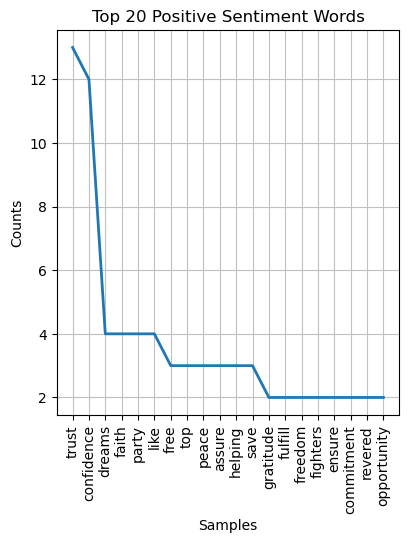

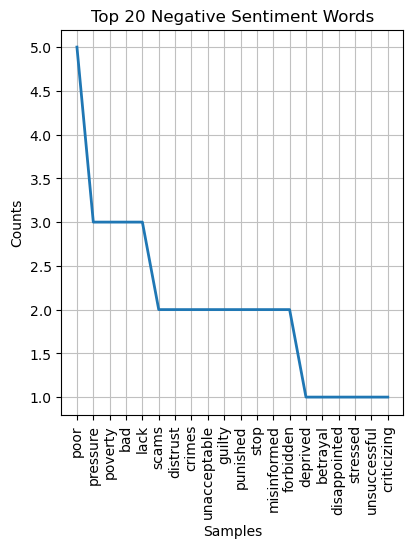

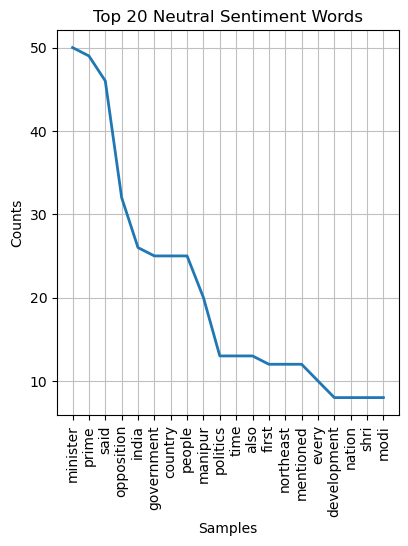

<Figure size 640x480 with 0 Axes>

In [269]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
word_freq_positive.plot(20, title="Top 20 Positive Sentiment Words")

plt.figure(figsize=(15, 5))
plt.subplot(132)
word_freq_negative.plot(20, title="Top 20 Negative Sentiment Words")

plt.figure(figsize=(15, 5))
plt.subplot(133)
word_freq_neutral.plot(20, title="Top 20 Neutral Sentiment Words")

plt.tight_layout()
plt.show()

In [270]:
df_positive = pd.DataFrame(word_freq_positive.most_common(20), columns=['Word', 'Frequency'])
df_negative = pd.DataFrame(word_freq_negative.most_common(20), columns=['Word', 'Frequency'])
df_neutral = pd.DataFrame(word_freq_neutral.most_common(20), columns=['Word', 'Frequency'])

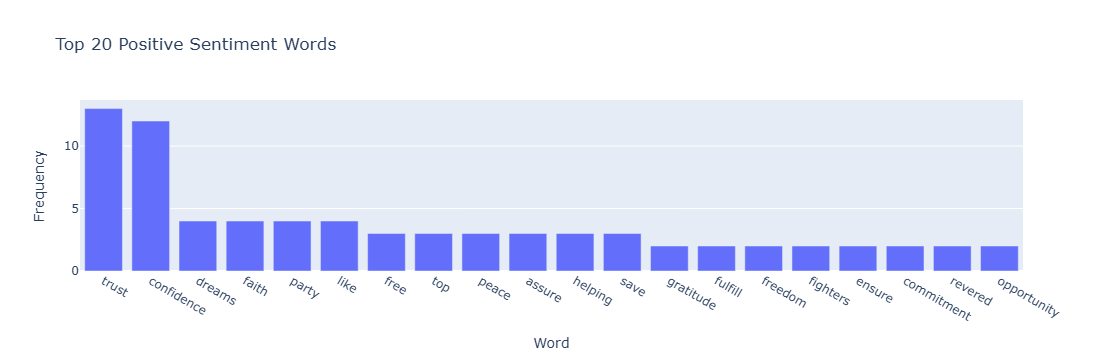

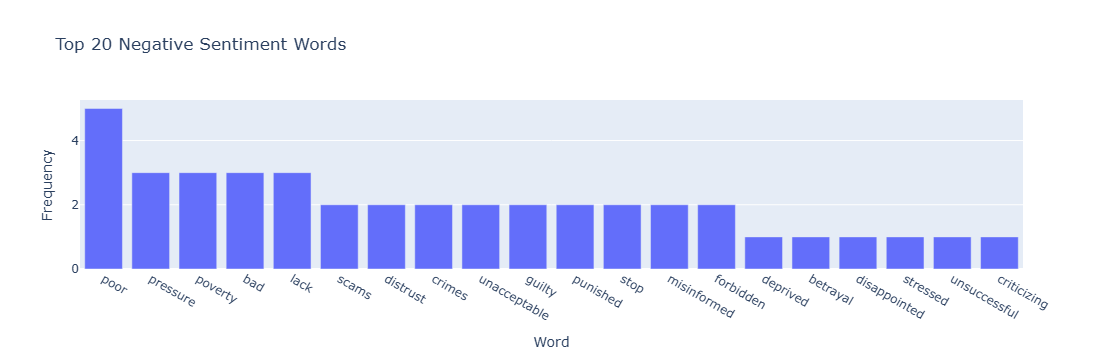

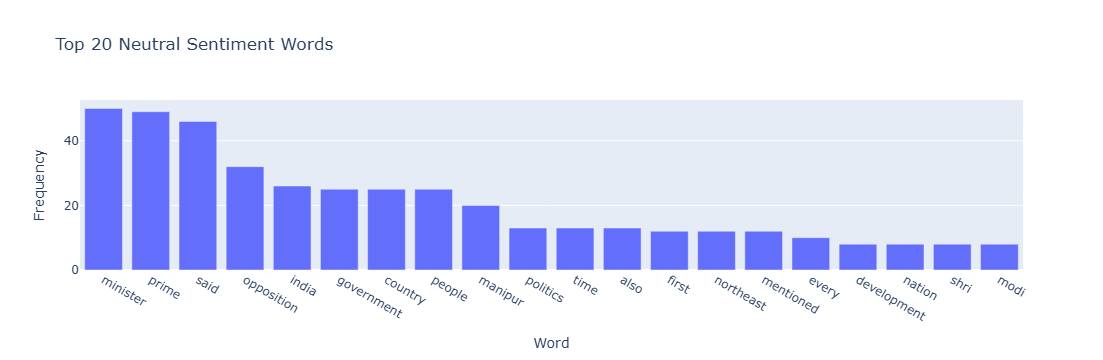

In [271]:
fig_positive = px.bar(df_positive, x='Word', y='Frequency', title="Top 20 Positive Sentiment Words")
fig_negative = px.bar(df_negative, x='Word', y='Frequency', title="Top 20 Negative Sentiment Words")
fig_neutral = px.bar(df_neutral, x='Word', y='Frequency', title="Top 20 Neutral Sentiment Words")

fig_positive.show()
fig_negative.show()
fig_neutral.show()

In [272]:
wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_positive)
wordcloud_negative = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_negative)
wordcloud_neutral = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_neutral)

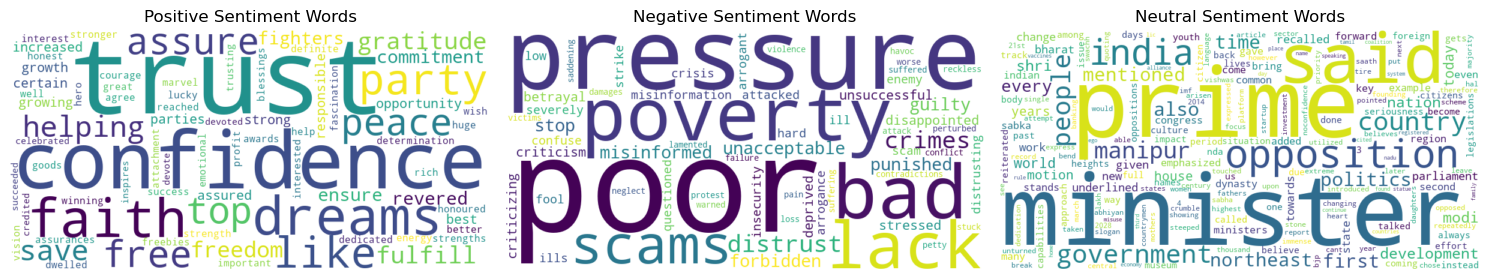

In [273]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment Words")

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment Words")

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.axis("off")
plt.title("Neutral Sentiment Words")

plt.tight_layout()
plt.show()

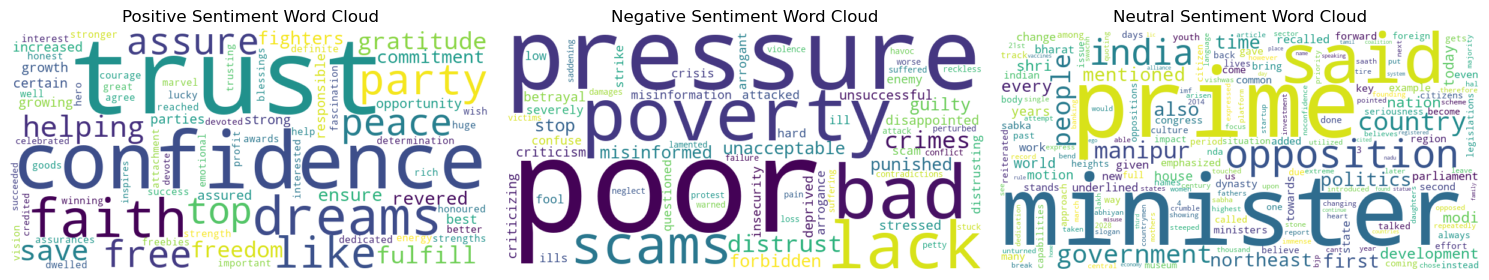

In [274]:
plt.figure(figsize=(15, 10))

plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Positive Sentiment Word Cloud")
plt.axis("off")

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Negative Sentiment Word Cloud")
plt.axis("off")

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.title("Neutral Sentiment Word Cloud")
plt.axis("off")

plt.tight_layout()
plt.show()

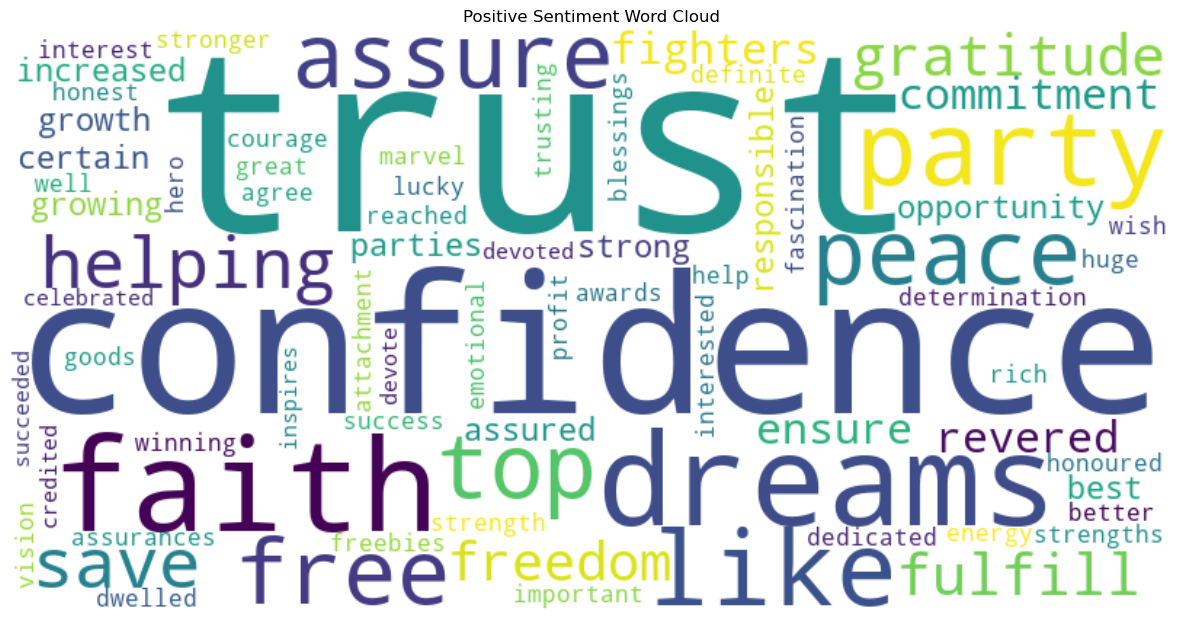

In [275]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Positive Sentiment Word Cloud")
plt.axis("off")
plt.show()

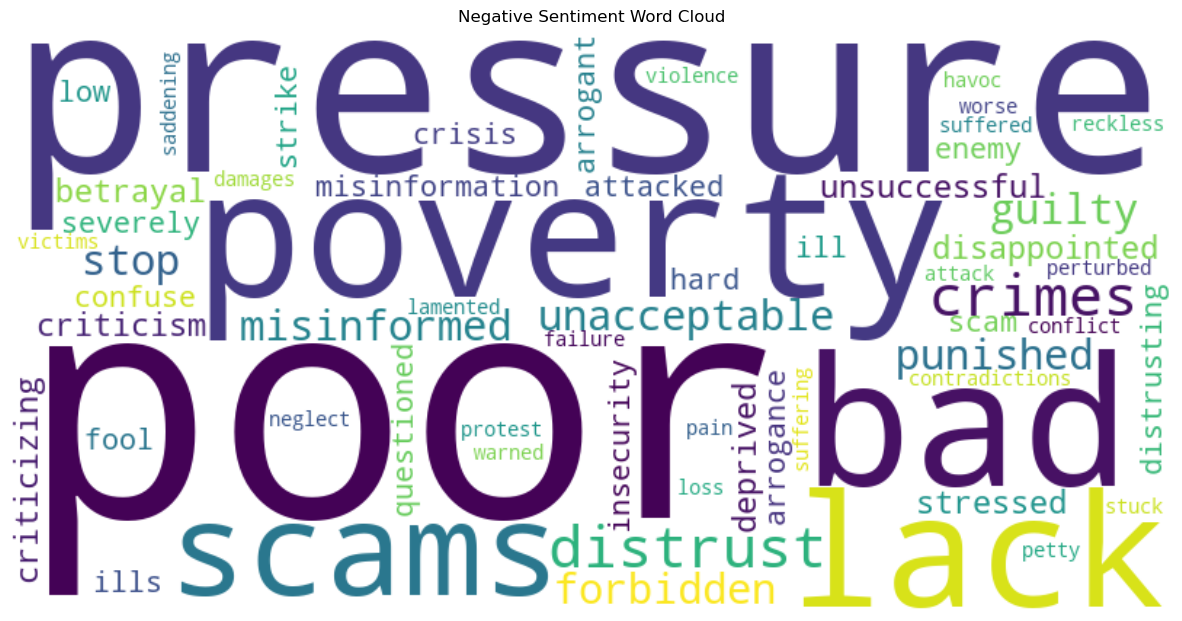

In [276]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Negative Sentiment Word Cloud")
plt.axis("off")
plt.show()

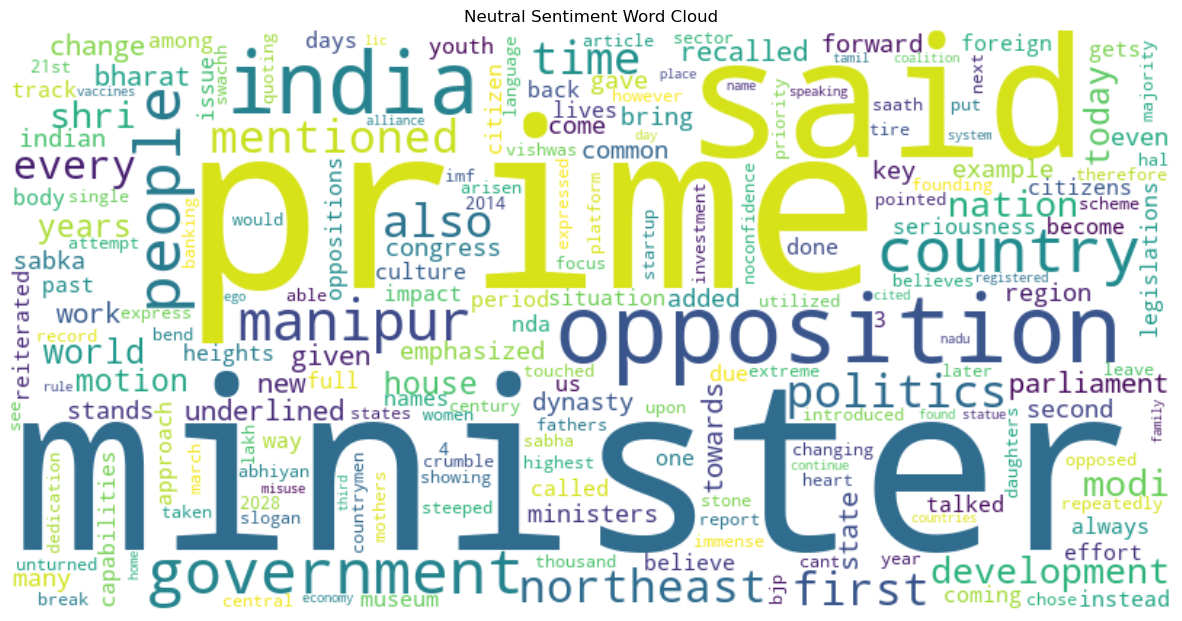

In [277]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.title("Neutral Sentiment Word Cloud")
plt.axis("off")
plt.show()

In [278]:
word_freq = nltk.FreqDist(words_lemmatized)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

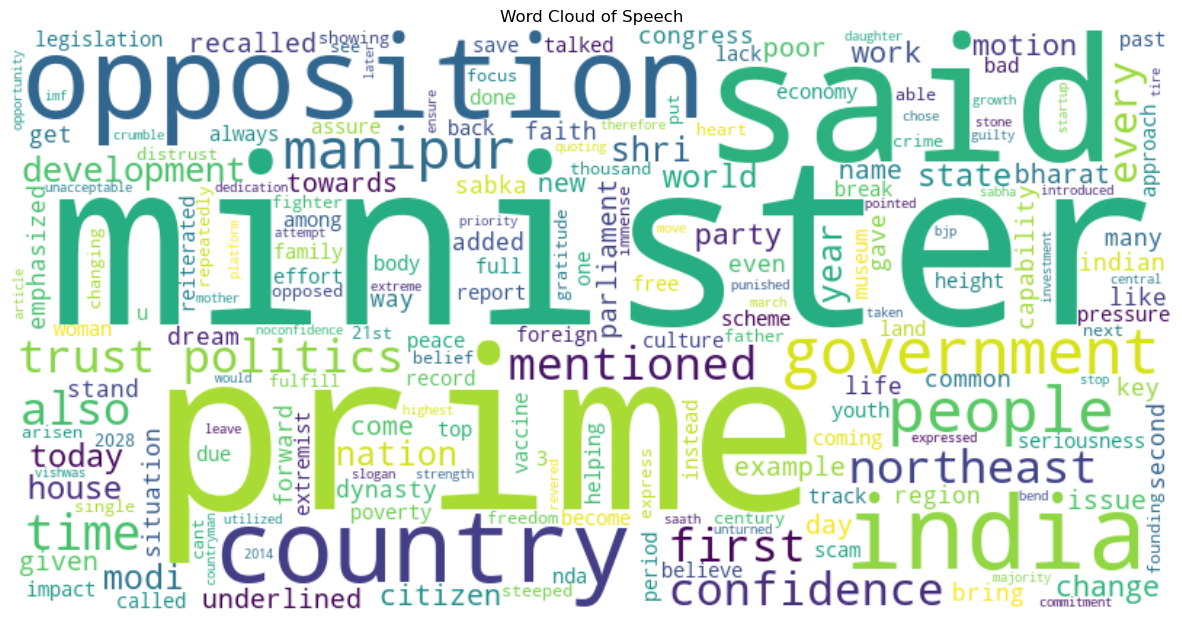

In [279]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Speech")
plt.show()

In [280]:
total_words = len(words_filtered)
positive_percentage = (len(positive_words) / total_words) * 100
negative_percentage = (len(negative_words) / total_words) * 100
neutral_percentage = (len(neutral_words) / total_words) * 100

print("Positive Sentiment Percentage:", positive_percentage)
print("Negative Sentiment Percentage:", negative_percentage)
print("Neutral Sentiment Percentage:", neutral_percentage)

Positive Sentiment Percentage: 8.614232209737828
Negative Sentiment Percentage: 5.118601747815231
Neutral Sentiment Percentage: 86.26716604244695


In [281]:
data = {'Sentiment': ['Positive', 'Negative', 'Neutral'],
        'Percentage': [positive_percentage, negative_percentage, neutral_percentage]}

In [282]:
df_percentages = pd.DataFrame(data)

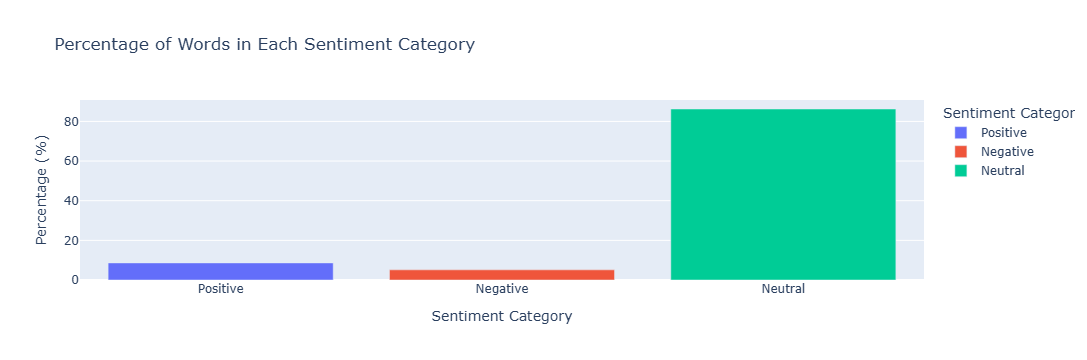

In [283]:
fig = px.bar(df_percentages, x='Sentiment', y='Percentage', color='Sentiment',
             labels={'Sentiment': 'Sentiment Category', 'Percentage': 'Percentage (%)'},
             title='Percentage of Words in Each Sentiment Category')
fig.show()